In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats

In [30]:
# Import the datasets
Baseline = pd.read_excel('../Baseline.xlsx', 'Impacts', header=1).dropna(axis=1)
Baseline_LFP = pd.read_excel('../Baseline-LFP.xlsx', 'Impacts', header=1).dropna(axis=1)
CuFe = pd.read_excel('../CuFe.xlsx', 'Impacts', header=1).dropna(axis=1)
CuFe_LFP = pd.read_excel('../CuFe-LFP.xlsx', 'Impacts', header=1).dropna(axis=1)

# Drop the UUID code column
Baseline.drop('Impact category UUID', axis=1, inplace=True)
Baseline_LFP.drop('Impact category UUID', axis=1, inplace=True)
CuFe.drop('Impact category UUID', axis=1, inplace=True)
CuFe_LFP.drop('Impact category UUID', axis=1, inplace=True)

# Create a new column defining the scenario name. This is useful for pivot tables
Baseline['Scenario'] = 'Baseline'
Baseline_LFP['Scenario'] = 'Baseline-LFP'
CuFe['Scenario'] = 'CuFe'
CuFe_LFP['Scenario'] = 'CuFe-LFP'

# Drop some uninteresting impact categories
# Customize the list if you want
dropped = [
    'Climate change: biogenic',
    'Climate change: fossil',
    'Climate change: land use and land use change',
    'Ecotoxicity: freshwater, inorganics',
    'Ecotoxicity: freshwater, organics',
    'Human toxicity: carcinogenic, inorganics',
    'Human toxicity: carcinogenic, organics',
    'Human toxicity: non-carcinogenic, inorganics',
    'Human toxicity: non-carcinogenic, organics'
]

for scenario in [Baseline, Baseline_LFP, CuFe, CuFe_LFP]:
    for cat in dropped:
        i = scenario[scenario['Impact category'] == cat].index
        scenario.drop(i, inplace=True)
    for i,row in scenario.iterrows():
        scenario.loc[i, 'Impact category'] = row['Impact category'] + ' [' + row['Reference unit'] + ']'
    scenario.drop('Reference unit', axis=1, inplace=True)

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [61]:
pivot_df

Scenario,Baseline,Baseline-LFP,CuFe,CuFe-LFP
Impact category,,,,
Acidification [mol H+-Eq],-159.763999,-118.398807,-161.185350,-1.219190e+02
Climate change [kg CO2-Eq],-6332.301522,-4336.639388,-7072.255705,-5.826798e+03
Ecotoxicity: freshwater [CTUe],-166312.829397,-124228.950558,-187013.614266,-1.399489e+05
"Energy resources: non-renewable [MJ, net calorific value]",-124648.242939,-88404.375690,-136710.969076,-1.151430e+05
Eutrophication: freshwater [kg P-Eq],-3.765241,-2.831296,-5.527529,-4.332957e+00
Eutrophication: marine [kg N-Eq],-11.224278,-8.771219,-12.389028,-1.002672e+01
Eutrophication: terrestrial [mol N-Eq],-103.531643,-78.979470,-119.654199,-9.367937e+01
Human toxicity: carcinogenic [CTUh],-0.000012,0.000004,-0.000011,6.251341e-07
Human toxicity: non-carcinogenic [CTUh],-0.000492,-0.000371,-0.000520,-3.926644e-04


In [215]:
# Get relative impacts (Baseline = 100%)
relative_impacts = {
    'Baseline': [100 for i in Baseline['Result']],
    'Baseline-LFP': [Baseline_LFP.iloc[i]['Result'] / Baseline.iloc[i]['Result'] * 100 for i in range(len(Baseline_LFP))],
    'CuFe': [CuFe.iloc[i]['Result'] / Baseline.iloc[i]['Result'] * 100 for i in range(len(CuFe))],
    'CuFe-LFP': [CuFe_LFP.iloc[i]['Result'] / Baseline.iloc[i]['Result'] * 100 for i in range(len(CuFe_LFP))],
}

relative_impacts = pd.DataFrame(relative_impacts, index=Baseline['Impact category'])
# relative_impacts = relative_impacts[relative_impacts.columns[::-1]]
relative_impacts

,Baseline,Baseline-LFP,CuFe,CuFe-LFP
Impact category,,,,
Acidification [mol H+-Eq],100,74.108565,100.889657,76.311924
Climate change [kg CO2-Eq],100,68.484411,111.685391,92.017071
Ecotoxicity: freshwater [CTUe],100,74.695952,112.446896,84.147959
"Energy resources: non-renewable [MJ, net calorific value]",100,70.923082,109.677414,92.374337
Eutrophication: freshwater [kg P-Eq],100,75.195614,146.804109,115.077794
Eutrophication: marine [kg N-Eq],100,78.145060,110.377063,89.330638
Eutrophication: terrestrial [mol N-Eq],100,76.285343,115.572587,90.483803
Human toxicity: carcinogenic [CTUh],100,-30.363367,92.568047,-5.406232
Human toxicity: non-carcinogenic [CTUh],100,75.447672,105.750778,79.864270


In [51]:
# For testing and checking (change 'i' for impact category)
i = 1

print('\t\t', Baseline.iloc[i]['Impact category'])
print('Baseline\t', Baseline.iloc[i]['Result'])
print('Baseline-LFP\t', Baseline_LFP.iloc[i]['Result'])
print('CuFe\t\t', CuFe.iloc[i]['Result'])
print('CuFe-LFP\t', CuFe_LFP.iloc[i]['Result'])

		 Climate change [kg CO2-Eq]
Baseline	 -6332.301522117168
Baseline-LFP	 -4336.639388094102
CuFe		 -7072.2557050119685
CuFe-LFP	 -5826.798382050282


In [52]:
# Convert the impact categories to abbreviations (includes also the 'dropped' categories!)
# Baseline['Impact category'] = ['A', 'CC', 'CCb', 'CCf', 'CClu', 'ETf', 'ETfi', 'ETfo', 'ERnr', 'Ef', 'Em', 'Et', 'HTc', 'HTci', 'HTco', 'HTnc', 'HTnci', 'HTnco', 'IRhh', 'LU', 'MRmm', 'OD', 'PMF', 'POFhh', 'WU']
# Baseline_LFP['Impact category'] = ['A', 'CC', 'CCb', 'CCf', 'CClu', 'ETf', 'ETfi', 'ETfo', 'ERnr', 'Ef', 'Em', 'Et', 'HTc', 'HTci', 'HTco', 'HTnc', 'HTnci', 'HTnco', 'IRhh', 'LU', 'MRmm', 'OD', 'PMF', 'POFhh', 'WU']
# CuFe['Impact category'] = ['A', 'CC', 'CCb', 'CCf', 'CClu', 'ETf', 'ETfi', 'ETfo', 'ERnr', 'Ef', 'Em', 'Et', 'HTc', 'HTci', 'HTco', 'HTnc', 'HTnci', 'HTnco', 'IRhh', 'LU', 'MRmm', 'OD', 'PMF', 'POFhh', 'WU']
# CuFe_LFP['Impact category'] = ['A', 'CC', 'CCb', 'CCf', 'CClu', 'ETf', 'ETfi', 'ETfo', 'ERnr', 'Ef', 'Em', 'Et', 'HTc', 'HTci', 'HTco', 'HTnc', 'HTnci', 'HTnco', 'IRhh', 'LU', 'MRmm', 'OD', 'PMF', 'POFhh', 'WU']

In [57]:
df = pd.concat([Baseline, Baseline_LFP, CuFe, CuFe_LFP])
pivot_df = df.pivot(columns='Scenario', index='Impact category', values='Result')
# pivot_df.reindex(index=df['Impact category'].unique(), columns=df['Scenario'].unique())

In [58]:
def parse_plot_df(pivot_df, i):
    df = pivot_df.copy()
    for j in range(len(df)):
        if j != i:
            df.drop(Baseline['Impact category'].iloc[j], inplace=True)
    return df

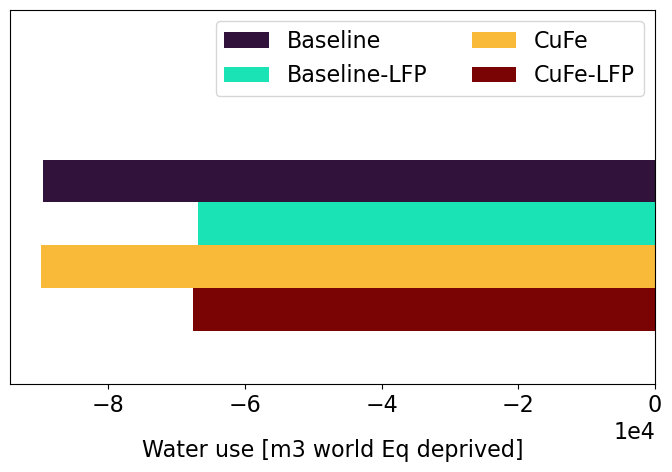

In [60]:
# Plot the histograms using full data
plot_df = pivot_df.copy()

fig, ax = plt.subplots(figsize=(7, 5))
mpl.rcParams.update({'font.size': 16})

i = 15
plot_df = parse_plot_df(pivot_df, i)
# plot_df = pivot_df.iloc[i]
plot_df[::-1].plot(
    kind='barh',
    ax=ax,
    cmap=mpl.colormaps['turbo'],
    # align='down',
    width=0.8,
)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, 3))
ax.set_xlabel(pivot_df.index.values[i], labelpad=16) #, fontdict={'size': 14})
ax.axes.get_yaxis().set_visible(False)
plt.yticks([-1.1])
plt.gca().invert_yaxis()
# ax.legend(bbox_to_anchor=(1, -0.2))
ax.legend(ncols=2)
plt.tight_layout()
plt.show()

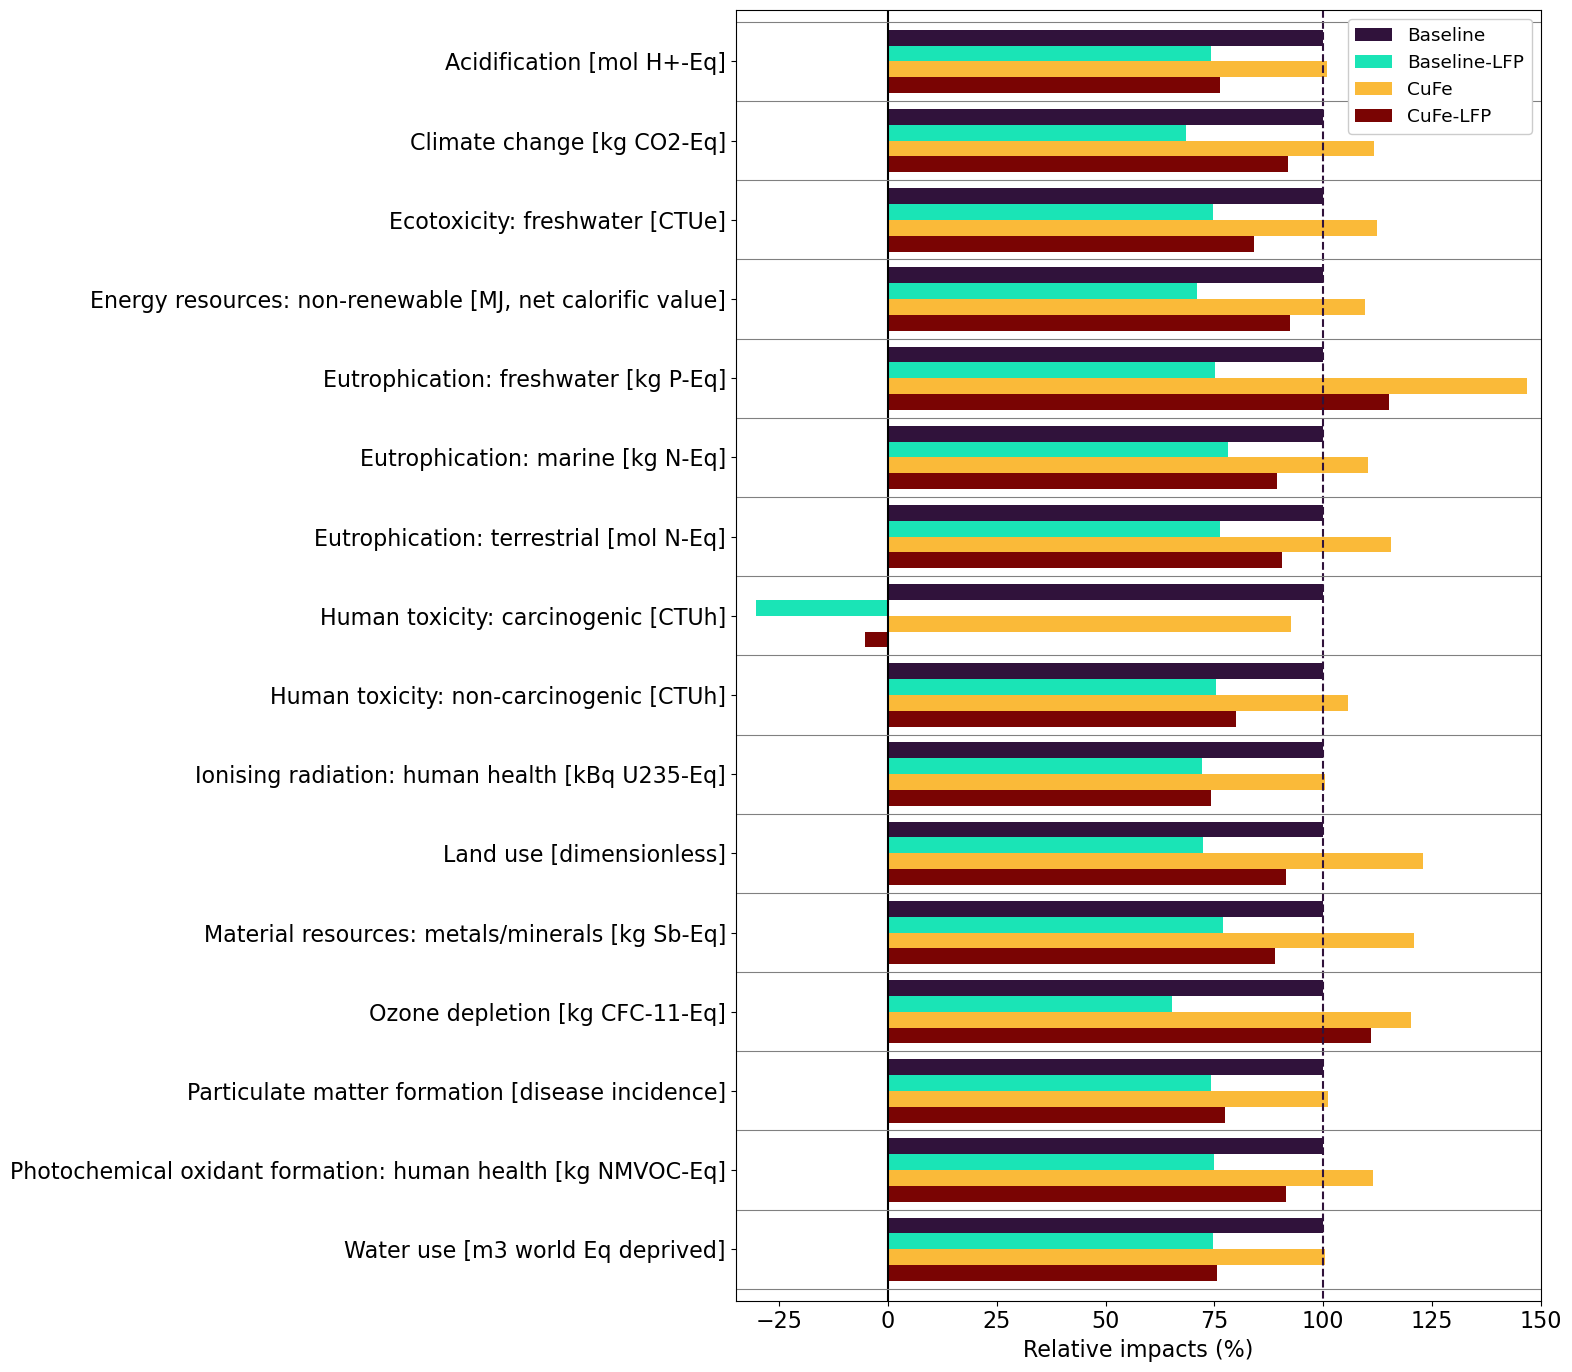

In [218]:
fig, ax = plt.subplots(figsize=(16, 14))
mpl.rcParams.update({'font.size': 16})

relative_impacts.plot(kind='barh', cmap=mpl.colormaps['turbo'], ax=ax, width=0.8)
# ax.plot(16, 100, 'k--')
ax.vlines(x=100, ymin=-1, ymax=16, linestyles='dashed', colors=mpl.colormaps['turbo'].colors[0])
ax.vlines(x=0, ymin=-1, ymax=16, colors='black')
ax.hlines(y=15.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=14.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=13.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=12.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=11.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=10.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=9.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=8.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=7.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=6.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=5.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=4.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=3.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=2.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=1.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=0.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')
ax.hlines(y=-0.5, xmin=-100, xmax=150, colors='grey', linewidth=0.8) #, linestyles='dashed')

ax.set_xlim([-35, 150])
ax.set_ylabel('')
ax.set_xlabel('Relative impacts (%)')
ax.legend(loc='best', fontsize='small', framealpha=1)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()